##Project 1: Predicting the fuel efficiency of a car
<li> To predict the fuel efficiency of a car in miles per gallon (MPG).</li>

In [54]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [55]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

In [56]:
df = pd.read_csv(url, names = column_names, na_values='?', comment ='\t', sep=' ', skipinitialspace = True)

In [57]:
#drop the NA rows
df = df.dropna()
df = df.reset_index(drop = True)

In [58]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [59]:
#train test split
import sklearn
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(df, train_size = 0.8, random_state=1)

In [60]:
df_train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,23.404153,5.402556,189.512780,102.929712,2961.198083,15.704473,75.929712,1.591054
std,7.666909,1.701506,102.675646,37.919046,848.602146,2.725399,3.675305,0.807923
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2219.000000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,140.000000,92.000000,2755.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,260.000000,120.000000,3574.000000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [61]:
train_stats = df_train.describe().transpose()

In [62]:
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
Horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
Model Year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [63]:
numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

In [64]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
  mean = train_stats.loc[col_name, 'mean']
  std = train_stats.loc[col_name, 'std']
  df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
  df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
203,28.0,-0.824303,-0.901020,-0.736562,-0.950031,0.255202,76,3
255,19.4,0.351127,0.413800,-0.340982,0.293190,0.548737,78,1
72,13.0,1.526556,1.144256,0.713897,1.339617,-0.625403,72,1
235,30.5,-0.824303,-0.891280,-1.053025,-1.072585,0.475353,77,1
37,14.0,1.526556,1.563051,1.636916,1.470420,-1.359240,71,1


We are going to assign each car into one of the four buckets as follows:<br>
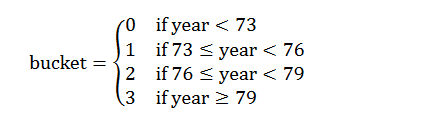

In [65]:
import torch

In [66]:
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['Model Year'].values)


In [67]:
v

tensor([81, 78, 74, 80, 81, 73, 81, 80, 79, 74, 76, 72, 81, 77, 70, 73, 79, 72,
        78, 78, 79, 73, 76, 73, 77, 73, 78, 81, 78, 71, 75, 79, 81, 81, 72, 70,
        79, 75, 73, 80, 82, 82, 71, 78, 79, 73, 72, 81, 76, 75, 81, 82, 79, 73,
        74, 74, 77, 70, 78, 73, 74, 73, 71, 73, 70, 75, 70, 75, 70, 73, 75, 76,
        72, 71, 75, 81, 82, 82, 74, 71, 77, 77, 76, 76, 82, 79, 78, 74, 80, 73,
        71, 73, 77, 74, 82, 75, 70, 78, 75, 78, 71, 80, 77, 77, 73, 81, 75, 72,
        82, 73, 70, 82, 73, 81, 80, 80, 70, 71, 71, 78, 71, 78, 71, 80, 82, 71,
        78, 71, 81, 72, 75, 74, 71, 77, 72, 78, 80, 78, 82, 82, 82, 71, 76, 75,
        78, 71, 73, 75, 77, 79, 71, 70, 73, 75, 72, 71, 76, 78, 74, 70, 82, 76,
        76, 76, 74, 79, 73, 76, 81, 74, 82, 81, 76, 78, 81, 77, 80, 77, 72, 80,
        80, 79, 76, 73, 73, 73, 79, 75, 81, 71, 75, 76, 76, 76, 80, 73, 77, 74,
        79, 72, 73, 76, 74, 74, 76, 75, 80, 70, 78, 73, 76, 77, 72, 79, 71, 81,
        70, 81, 72, 76, 72, 78, 82, 74, 

In [68]:
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right = True)

In [69]:
df_train_norm['Model Year Bucketed']

334    3
258    2
139    1
310    3
349    3
      ..
203    2
255    2
72     0
235    2
37     0
Name: Model Year Bucketed, Length: 313, dtype: int64

In [70]:
v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right = True)
numeric_column_names.append('Model Year Bucketed')

In [71]:
df_train_norm.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Model Year Bucketed
334,27.2,-0.824303,-0.530922,-0.499214,-0.555264,-0.001641,81,1,3
258,18.6,0.351127,0.345625,0.186457,0.776338,1.099115,78,1,2
139,29.0,-0.824303,-0.891280,-0.525586,-0.874613,0.291894,74,2,1
310,37.2,-0.824303,-1.008153,-1.000281,-1.110294,0.255202,80,3,3
349,33.0,-0.824303,-0.823104,-0.762934,-0.908786,-0.552019,81,2,3


In [72]:
#Now proceed with defining a list for the unordered categorical feature, Origin.
#It can be done through two ways
#(1) Embedding
#(2) One hot encoding
# Here One hot encoding is used

In [73]:
# here we will use one-hot-encoding approach on the categorical features to convert into dense format
from torch.nn.functional import one_hot
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(df_train_norm['Origin'].values) % total_origin)


In [74]:
#origin_encoded

In [75]:
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)
x_train_numeric

tensor([[-8.2430e-01, -5.3092e-01, -4.9921e-01, -5.5526e-01, -1.6412e-03,
          3.0000e+00],
        [ 3.5113e-01,  3.4562e-01,  1.8646e-01,  7.7634e-01,  1.0991e+00,
          2.0000e+00],
        [-8.2430e-01, -8.9128e-01, -5.2559e-01, -8.7461e-01,  2.9189e-01,
          1.0000e+00],
        ...,
        [ 1.5266e+00,  1.1443e+00,  7.1390e-01,  1.3396e+00, -6.2540e-01,
          0.0000e+00],
        [-8.2430e-01, -8.9128e-01, -1.0530e+00, -1.0726e+00,  4.7535e-01,
          2.0000e+00],
        [ 1.5266e+00,  1.5631e+00,  1.6369e+00,  1.4704e+00, -1.3592e+00,
          0.0000e+00]], dtype=torch.float64)

In [76]:
x_train = torch.cat([x_train_numeric, origin_encoded],1).float()
x_train

tensor([[-0.8243, -0.5309, -0.4992,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.3511,  0.3456,  0.1865,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8243, -0.8913, -0.5256,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [ 1.5266,  1.1443,  0.7139,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8243, -0.8913, -1.0530,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.5266,  1.5631,  1.6369,  ...,  0.0000,  1.0000,  0.0000]])

In [77]:
origin_encoded = one_hot(torch.from_numpy(df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

In [78]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

#### Training a DNN regression model

In [79]:
#Now after constructing the mandatory features and labels, we will create a data loader that uses a batch size of 8 for the train data
from torch.utils.data import TensorDataset, Dataset, DataLoader
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle= True)

In [80]:
#Now build a model with two fully connected layers
#layer 1 = 8 hidden units
#output layer = 4 units
import torch.nn as nn
hidden_units = [8, 4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
  layer = nn.Linear(input_size, hidden_unit)
  all_layers.append(layer)
  all_layers.append(nn.ReLU())
  input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [81]:
all_layers

[Linear(in_features=9, out_features=8, bias=True),
 ReLU(),
 Linear(in_features=8, out_features=4, bias=True),
 ReLU(),
 Linear(in_features=4, out_features=1, bias=True)]

In [82]:
#LOSS function
#After defining the model, define the MSE loss function for regression and use SGD for optimization
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [83]:
#Now, train the model for 200 epochs
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

In [84]:
for epoch in range(num_epochs):
  loss_hist_train = 0
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:, 0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    loss_hist_train += loss.item()
  if epoch % log_epochs == 0:
    print(f'Epoch {epoch} Loss 'f'{loss_hist_train/len(train_dl):.4f}')

Epoch 0 Loss 219.6977
Epoch 20 Loss 141.0945
Epoch 40 Loss 143.2002
Epoch 60 Loss 98.1447
Epoch 80 Loss 159.1696
Epoch 100 Loss 141.4105
Epoch 120 Loss 104.5097
Epoch 140 Loss 143.9878
Epoch 160 Loss 92.1651
Epoch 180 Loss 155.2696


In [85]:
 #Evaluating the regression performance
 with torch.no_grad():
  pred = model(x_test.float())[:, 0]
  loss = loss_fn(pred, y_test)
  print(f'Test MSE: {loss.item():.4f}')
  print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 236.3044
Test MAE: 13.3567
